In [35]:
! pip install -U scikit-learn
import pandas as pd
import datetime
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import seaborn as sns
import pickle as pkl

Requirement already up-to-date: scikit-learn in /opt/anaconda3/lib/python3.7/site-packages (0.23.1)


In [109]:
sf = pd.read_csv('ca_san_francisco_2020_04_01.csv')

In [115]:
sf = sf.loc[sf.subject_race != 'other',:]

array(['asian/pacific islander', 'black', 'hispanic', ..., 'white',
       'black', 'white'], dtype=object)

In [116]:
race_dummy = pd.get_dummies(sf.subject_race, drop_first=True)
sex_dummy = pd.get_dummies(sf.subject_sex, drop_first=True)
df = sf.drop(columns = ['raw_row_number','date','outcome','time','type','location','subject_race','subject_sex','lat', 'lng', 'district','citation_issued', 'warning_issued','reason_for_stop',
   'raw_search_vehicle_description', 'raw_result_of_contact_description','arrest_made','search_vehicle','search_basis'], axis=1)
df.subject_age = pd.to_numeric(df.subject_age)
sf_sparse = pd.concat([df,race_dummy,sex_dummy],axis=1)
sf_sparse = sf_sparse.dropna()

In [118]:
sf.arrest_made = sf.arrest_made.dropna()
X = sf_sparse.dropna()
y = sf.arrest_made.sample(n=47072,random_state=1)
clf = RandomForestClassifier(max_depth=2, random_state=46)
proto = clf.fit(X, y)
X.columns

Index(['subject_age', 'contraband_found', 'search_conducted', 'black',
       'hispanic', 'white', 'male'],
      dtype='object')

In [119]:
proto.feature_importances_

array([0.56797724, 0.08555343, 0.        , 0.0745499 , 0.12160013,
       0.04227142, 0.10804789])

In [122]:
pd.DataFrame({'Variable':X.columns,
              'Importance':proto.feature_importances_}).sort_values('Importance', ascending=False)

,Variable,Importance
0,subject_age,0.567977
4,hispanic,0.121600
6,male,0.108048
1,contraband_found,0.085553
3,black,0.074550
5,white,0.042271
2,search_conducted,0.000000


Text(0.5, 1.0, 'Feature Importances - Random Forest Classifier')

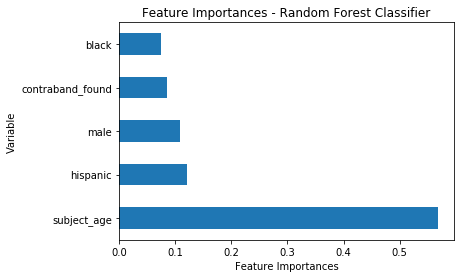

In [132]:
feat_importances = pd.Series(proto.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.xlabel("Feature Importances")
plt.ylabel("Variable")
plt.title("Feature Importances - Random Forest Classifier")

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [36]:
gnb = GaussianNB()

In [37]:
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [38]:
y_pred

array([False, False, False, ..., False, False, False])

In [40]:
nb = {
    'Class Count' : gnb.class_count_,
    'Class Prior' : gnb.class_prior_,
}

In [41]:
nb

{'Class Count': array([668013.,   8932.]),
 'Class Prior': array([0.98680543, 0.01319457])}

In [52]:
score = gnb.score(X_train,y_train)

In [53]:
score

0.9868054273242287